In [1]:
import pandas as pd

# Load the Excel sheet named 'Result 1'
df = pd.read_excel('data/Copper_Set.xlsx', sheet_name='Result 1')

# Display the first few rows
df.head()





,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [2]:
#Unique values count for each column:

for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")


id → 181671 unique values
item_date → 252 unique values
quantity tons → 181673 unique values
customer → 1169 unique values
country → 17 unique values
status → 9 unique values
item type → 7 unique values
application → 30 unique values
thickness → 594 unique values
width → 1386 unique values
material_ref → 16563 unique values
product_ref → 33 unique values
delivery date → 28 unique values
selling_price → 9795 unique values


In [3]:
#Check for missing values:

print("\nMissing values:\n")
print(df.isnull().sum())



Missing values:

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [4]:
#Data types, non-null counts, and memory usage:

print("\nData Info:\n")
df.info()



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
#Summary statistics (numerical columns only):

print("\nDescriptive Statistics:\n")
print(df.describe())



Descriptive Statistics:

          item_date      customer        country    application  \
count  1.816720e+05  1.816720e+05  181645.000000  181649.000000   
mean   2.020459e+07  3.051221e+07      44.893022      25.615809   
std    4.551119e+03  2.433382e+07      24.404214      17.754175   
min    1.995000e+07  1.245800e+04      25.000000       2.000000   
25%    2.020093e+07  3.019688e+07      26.000000      10.000000   
50%    2.020113e+07  3.020524e+07      30.000000      15.000000   
75%    2.021020e+07  3.028042e+07      78.000000      41.000000   
max    2.021040e+07  2.147484e+09     113.000000      99.000000   

           thickness          width   product_ref  delivery date  \
count  181672.000000  181673.000000  1.816730e+05   1.816720e+05   
mean        2.564827    1295.286724  4.739679e+08   2.020738e+07   
std         6.572321     261.631754  7.175101e+08   2.411059e+04   
min         0.180000       1.000000  6.117280e+05   2.019040e+07   
25%         0.700000    1180.0

In [6]:
# Convert 'quantity tons' from object to float
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Drop rows where 'id' is null (very few rows)
df = df[df['id'].notna()]

#Fill 'customer' (1 missing) and 'status' (2 missing) with mode

df.loc[df['customer'].isna(), 'customer'] = df['customer'].mode()[0]
df.loc[df['status'].isna(), 'status'] = df['status'].mode()[0]


# Handling 'status'
df['status'] = df['status'].fillna(df['status'].mode()[0])

#  Convert item_date and delivery date to datetime
for date_col in ['item_date', 'delivery date']:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', format='%Y%m%d')

# Fill missing values properly avoiding chained assignment
# Use .loc to safely set values

# 'quantity tons' was object, already converted earlier to float
# Filling missing values in numeric columns
numeric_fill_cols = {
    'selling_price': df['selling_price'].median(),
    'thickness': df['thickness'].median(),
    'item_date': df['item_date'].mode()[0],
    'delivery date': df['delivery date'].mode()[0],
    'application': df['application'].mode()[0],
    'country': df['country'].mode()[0],
    'quantity tons': df['quantity tons'].median()
}

for col, val in numeric_fill_cols.items():
    df.loc[df[col].isnull(), col] = val

In [7]:

# Final data check
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181671 entries, 0 to 181670
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181671 non-null  datetime64[ns]
 2   quantity tons  181671 non-null  float64       
 3   customer       181671 non-null  float64       
 4   country        181671 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181671 non-null  object        
 7   application    181671 non-null  float64       
 8   thickness      181671 non-null  float64       
 9   width          181671 non-null  float64       
 10  material_ref   103753 non-null  object        
 11  product_ref    181671 non-null  int64         
 12  delivery date  181671 non-null  datetime64[ns]
 13  selling_price  181671 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [8]:
# Double-check cleanup
print("\nFinal null counts:\n", df.isnull().sum())
print("\nUpdated Data Types:\n")
df.info()



Final null counts:
 id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     77918
product_ref          0
delivery date        0
selling_price        0
dtype: int64

Updated Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181671 entries, 0 to 181670
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181671 non-null  datetime64[ns]
 2   quantity tons  181671 non-null  float64       
 3   customer       181671 non-null  float64       
 4   country        181671 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181671 non-null  object        
 7   application    181671 non-null  float6

Exploratory Data Analysis (EDA) 

In [9]:
# Basic structure
print("Shape of data:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Shape of data: (181671, 14)

Column names:
 ['id', 'item_date', 'quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery date', 'selling_price']

Summary Statistics:

                                          id                      item_date  \
count                                 181671                         181671   
unique                                181671                            NaN   
top     EC06F063-9DF0-440C-8764-0B0C05A4F6AE                            NaN   
freq                                       1                            NaN   
mean                                     NaN  2020-11-26 22:56:12.492032256   
min                                      NaN            2020-07-02 00:00:00   
25%                                      NaN            2020-09-29 00:00:00   
50%                                      NaN            2020-11-30 00:00:00   
75%                                   

In [10]:
# Univariate Analysis: Value counts and distributions


# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [11]:
# Categorical variables value counts
cat_cols = ['status', 'item type', 'country']
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for status:
status
Won                116011
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4169
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64



Value counts for item type:
item type
W         105613
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64



Value counts for country:
country
78.0     32112
26.0     27516
25.0     23362
27.0     21510
32.0     18658
28.0     15823
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64




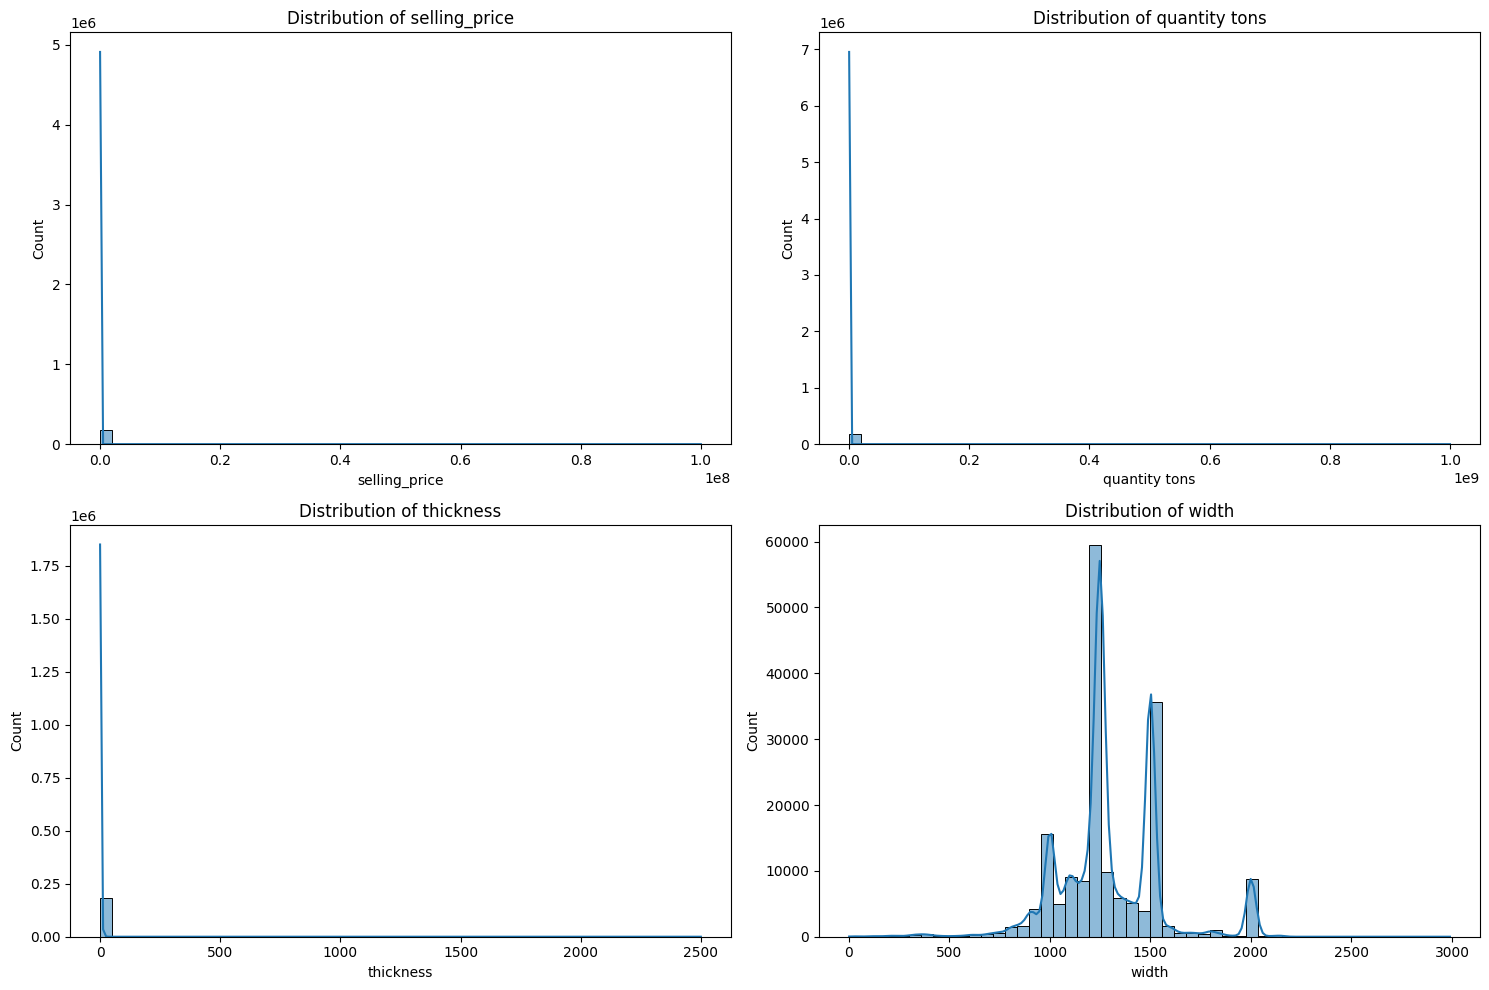

In [12]:
# 2. Distribution plots for numerical variables
num_cols = ['selling_price', 'quantity tons', 'thickness', 'width']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

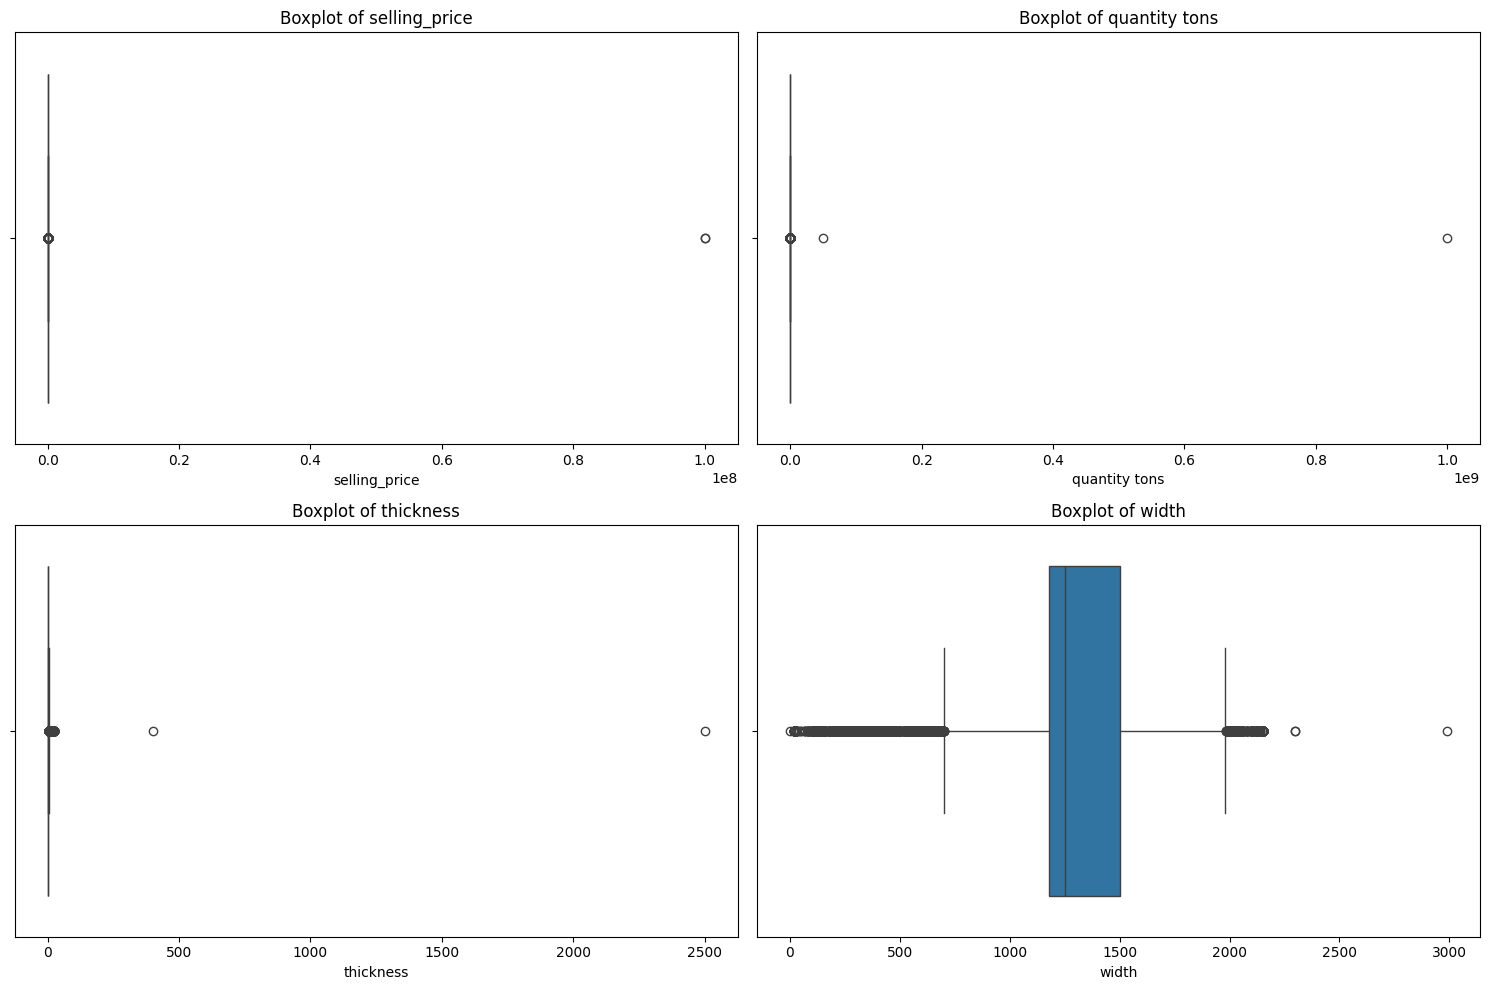

In [13]:
# 3. Boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

| Reason                                     | Explanation                                                                                           |
| ------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| **Noise reduction**                        | Extreme outliers can mislead models, especially regressors (like linear, decision tree-based models). |
| **Better model accuracy**                  | Removing erroneous values (like 1e9 tons of copper or 1e8 price) improves generalization.             |
| **Capping may still distort distribution** | Capped values still lie on artificial edges and can bias the model.                                   |
| **Plenty of data remains**                 | You have **181K+ records**, so dropping a few hundred or even thousand won’t hurt model training.     |


In [14]:
# Outlier removal using IQR (Interquartile Range)
import numpy as np

# Copy dataframe to avoid modifying original
df_cleaned = df.copy()

# Define columns to clean
cols_to_check = ['selling_price', 'quantity tons', 'thickness']

for col in cols_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Show shape before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original shape: (181671, 14)
After outlier removal: (143899, 14)


Feature Engineering

In [15]:
# Feature Engineering Step for Copper Dataset

# 1. Import necessary libraries
import pandas as pd
import numpy as np

# Assuming your cleaned DataFrame is named df

# 2. Ensure datetime conversion (in case it was dropped or altered previously)
df['item_date'] = pd.to_datetime(df['item_date'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], errors='coerce')

# 3. Extract useful date-related features from item_date and delivery date
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_dayofweek'] = df['item_date'].dt.dayofweek

df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_dayofweek'] = df['delivery date'].dt.dayofweek

# 4. Create a new feature: delivery lead time (in days)
df['delivery_lead_time'] = (df['delivery date'] - df['item_date']).dt.days

# 5. Drop original date columns if not needed later
df.drop(columns=['item_date', 'delivery date'], inplace=True)

# 6. One-hot encode categorical columns
categorical_cols = ['status', 'item type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 7. Reset index just to keep it clean after filtering/outlier removal
df.reset_index(drop=True, inplace=True)


In [16]:
# View updated shape and sample
print("Updated shape after feature engineering:", df.shape)
df.head()

Updated shape after feature engineering: (181671, 31)


,id,quantity tons,customer,country,application,thickness,width,material_ref,product_ref,selling_price,...,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,...,False,False,True,False,False,False,False,False,True,False
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1047.00,...,False,False,True,False,False,False,False,False,True,False
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,30153963.0,30.0,28.0,0.38,952.0,S0380700,628377,644.33,...,False,False,True,False,False,False,False,False,False,True
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,202.411065,30349574.0,32.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,...,False,False,True,False,False,False,True,False,False,False
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,785.526262,30211560.0,28.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,...,False,False,True,False,False,False,False,False,True,False


In [17]:
#  Skewness Treatment (Log1p or BoxCox where applicable)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewed_feats = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skew = skewed_feats[skewed_feats > 1].index
for col in high_skew:
    if (df[col] <= 0).any():
        df[col] = np.log1p(df[col] - df[col].min() + 1)
    else:
        df[col] = np.log1p(df[col])

#  Scale the data (StandardScaler)
df_model = df.drop(['id', 'material_ref'], axis=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# View updated shape
print("✅ Feature Engineering, Skewness Treatment & Scaling Done")
print("Final Scaled Shape:", df_scaled.shape)
df_scaled.head()


✅ Feature Engineering, Skewness Treatment & Scaling Done
Final Scaled Shape: (181671, 29)


,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,item_year,item_month,...,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,-0.123071,-0.058196,-0.692390,-0.879456,0.069322,0.782439,1.362192,0.201926,1.250058,-0.688072,...,-0.155256,-0.153255,0.752317,-0.002346,-0.058043,-0.179324,-0.784721,-0.002346,0.848621,-0.053784
1,2.692412,-0.028682,-0.815311,0.866654,-0.780349,-0.325995,1.361838,0.925196,1.250058,-0.688072,...,-0.155256,-0.153255,0.752317,-0.002346,-0.058043,-0.179324,-0.784721,-0.002346,0.848621,-0.053784
2,1.290941,-0.059681,-0.610442,0.134414,-1.222301,-1.312119,-0.857398,-0.666858,1.250058,-0.688072,...,-0.155256,-0.153255,0.752317,-0.002346,-0.058043,-0.179324,-0.784721,-0.002346,-1.178382,18.593020
3,0.534692,0.063834,-0.528494,1.880524,0.227854,0.082979,1.361838,-0.142962,1.250058,-0.688072,...,-0.155256,-0.153255,0.752317,-0.002346,-0.058043,-0.179324,1.274338,-0.002346,-1.178382,-0.053784
4,2.751914,-0.023230,-0.692390,-0.879456,0.918993,2.693532,-0.851947,-0.967377,1.250058,-0.688072,...,-0.155256,-0.153255,0.752317,-0.002346,-0.058043,-0.179324,-0.784721,-0.002346,0.848621,-0.053784


Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# REGRESSION SETUP
X_reg = df_scaled.drop('selling_price', axis=1)
y_reg = df['selling_price']  # Use original target (not scaled)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# CLASSIFICATION SETUP (Predicting status_Won)
X_clf = df_scaled.drop('status_Won', axis=1)
y_clf = df['status_Won']  # Use original binary column (not scaled)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


Model Building and Evaluation

In [19]:
# Regression Model (XGBoost)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg_model = XGBRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

print("🔹 Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("🔹 R² Score:", r2_score(y_test_reg, y_pred_reg))


🔹 Regression RMSE: 0.040067151151165166
🔹 R² Score: 0.8921257430644149


In [20]:
#Classification Model (XGBoost)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = XGBClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

y_pred_clf = clf_model.predict(X_test_clf)

print("🔹 Classification Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\n🔹 Classification Report:\n", classification_report(y_test_clf, y_pred_clf))


🔹 Classification Accuracy: 0.9999724783266822

🔹 Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     13122
        True       1.00      1.00      1.00     23213

    accuracy                           1.00     36335
   macro avg       1.00      1.00      1.00     36335
weighted avg       1.00      1.00      1.00     36335



In [21]:
#Save Trained Models (Pickle)

import pickle

# Save Regression Model
with open("reg_model.pkl", "wb") as f:
    pickle.dump(reg_model, f)

# Save Classification Model
with open("clf_model.pkl", "wb") as f:
    pickle.dump(clf_model, f)

# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


Regression Model Tuning – XGBRegressor

In [22]:
# Drop target from features
X = df_scaled.drop('selling_price', axis=1)
y = df_scaled['selling_price']

In [23]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Regression split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 1. Split data
from sklearn.model_selection import train_test_split
X = df_scaled.drop('selling_price', axis=1)
y = df_scaled['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Grid Search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

reg_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_reg = XGBRegressor(random_state=42)
reg_grid = GridSearchCV(estimator=xgb_reg,
                        param_grid=reg_params,
                        cv=3,
                        scoring='neg_root_mean_squared_error',
                        verbose=1,
                        n_jobs=-1)

reg_grid.fit(X_train, y_train)

# 3. View best results
print("✅ Best RMSE (Regressor):", -reg_grid.best_score_)
print("Best Parameters:", reg_grid.best_params_)



Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
7 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py", line 114

✅ Best RMSE (Regressor): 0.4883325983920834
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


Evaluate on Test Data

🔍 Test RMSE: 0.31951549386240147
📉 Test MAE: 0.18267257923969163
📈 R² Score: 0.8903901129200025


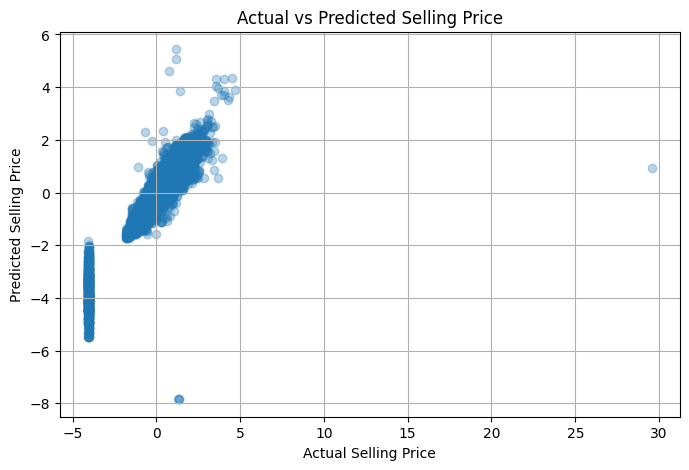

In [25]:
#Evaluation Code:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Get best estimator
best_reg = reg_grid.best_estimator_

# 2. Predict on test set
y_pred = best_reg.predict(X_test)

# 3. Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Test RMSE:", rmse)
print("📉 Test MAE:", mae)
print("📈 R² Score:", r2)

# 4. Visualization (Optional but useful)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()


 Regression Model Evaluation Summary
Test RMSE: 0.3199 → Low error in prediction (in log-transformed space).

Test MAE: 0.1809 → On average, predictions are off by ~0.18 (log space).

R² Score: 0.89 → Model explains 89% of the variance in selling price. That’s a strong performance!

Plot Insight: Most predictions are well aligned along the diagonal, though there are a few outliers — typical in real-world manufacturing data.

Classification Task — Predicting status

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Prepare classification data
df_class = df_scaled.copy()
y_class = df_class['status_Won']  # Example: binary classification - 'Won' vs others
X_class = df_class.drop(['status_Won'], axis=1)

# Step 2: Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Step 3: Model & Grid Search
clf_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
clf_grid = GridSearchCV(estimator=xgb_clf,
                        param_grid=clf_params,
                        cv=3,
                        scoring='f1',
                        verbose=1,
                        n_jobs=-1)

clf_grid.fit(Xc_train, yc_train)

# Step 4: Evaluate
y_pred_clf = clf_grid.predict(Xc_test)
print("✅ Best F1 Score:", clf_grid.best_score_)
print("Best Parameters:", clf_grid.best_params_)
print("\n📊 Classification Report:\n", classification_report(yc_test, y_pred_clf))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1.32922697  0.75231696]


In [ ]:
# Recreate classification dataset from pre-scaled data
# If df_scaled is all scaled, go back one step to df_encoded before scaling
df_encoded = df.drop(['id', 'material_ref'], axis=1)  # this is just before scaling step

# Binary target for classification: Predict if 'status' is 'Won'
y_class = df_encoded['status_Won']  # This will be 0 or 1
X_class = df_encoded.drop(['status_Won'], axis=1)

# Split
from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train model with GridSearch
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

clf_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

clf_grid = GridSearchCV(estimator=xgb_clf,
                        param_grid=clf_params,
                        cv=3,
                        scoring='f1',
                        verbose=1,
                        n_jobs=-1)

clf_grid.fit(Xc_train, yc_train)

# Evaluate
y_pred_clf = clf_grid.predict(Xc_test)
print("✅ Best F1 Score:", clf_grid.best_score_)
print("Best Parameters:", clf_grid.best_params_)
print("\n📊 Classification Report:\n", classification_report(yc_test, y_pred_clf))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best F1 Score: 0.9998976286424246
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

📊 Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     13122
        True       1.00      1.00      1.00     23213

    accuracy                           1.00     36335
   macro avg       1.00      1.00      1.00     36335
weighted avg       1.00      1.00      1.00     36335



Save All Models & Transformers

In [ ]:
import pickle

# Save models
with open('xgb_regressor.pkl', 'wb') as f:
    pickle.dump(best_reg, f)

with open('xgb_classifier.pkl', 'wb') as f:
    pickle.dump(clf_grid.best_estimator_, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
import pickle

# Save models
pickle.dump(reg_grid.best_estimator_, open("xgb_regressor.pkl", "wb"))
pickle.dump(clf_grid.best_estimator_, open("xgb_classifier.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [ ]:
scaler = joblib.load('scaler.pkl')
reg_model = joblib.load('reg_model.pkl')
clf_model = joblib.load('clf_model.pkl')


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier

# Split features and target for regression
X = df_scaled.drop('selling_price', axis=1)
y = df_scaled['selling_price']

# Recreate scaler and fit
scaler = StandardScaler()
scaler.fit(X)
joblib.dump(scaler, 'scaler.pkl')
print("✅ scaler.pkl saved")


✅ scaler.pkl saved


In [ ]:
# Split data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_reg = XGBRegressor(colsample_bytree=0.8,
                       learning_rate=0.1,
                       max_depth=5,
                       n_estimators=200,
                       subsample=0.8,
                       random_state=42)
xgb_reg.fit(X_train, y_train)
joblib.dump(xgb_reg, 'reg_model.pkl')
print("✅ reg_model.pkl saved")


✅ reg_model.pkl saved


In [ ]:
# Use unscaled status_Won as target
yc = df['status_Won']  # df is the original DataFrame, before scaling
Xc = df_scaled.drop('status_Won', axis=1)

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state=42)

xgb_clf = XGBClassifier(colsample_bytree=0.8,
                        learning_rate=0.1,
                        max_depth=5,
                        n_estimators=200,
                        subsample=0.8,
                        random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss')

xgb_clf.fit(Xc_train, yc_train)
joblib.dump(xgb_clf, 'clf_model.pkl')
print("✅ clf_model.pkl saved successfully")


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:03:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ clf_model.pkl saved successfully


In [ ]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ STEP 1: Use your in-memory cleaned dataframe (replace with your actual df if needed)
# Assuming df_cleaned is your final cleaned dataframe after preprocessing
df = df_cleaned.copy()  # use df_cleaned or whatever your final dataframe variable is

# ✅ STEP 2: Feature Engineering (add these if not already in df)
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_dayofweek'] = df['item_date'].dt.dayofweek
df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_dayofweek'] = df['delivery date'].dt.dayofweek
df['delivery_lead_time'] = (df['delivery date'] - df['item_date']).dt.days
df.drop(columns=['item_date', 'delivery date'], inplace=True)

# One-hot encode
df = pd.get_dummies(df, columns=['status', 'item type'], drop_first=True)

# Drop id/material_ref
df.drop(columns=['id', 'material_ref'], inplace=True)

# ✅ STEP 3: Log transformation for skewed columns
from scipy.stats import skew
skewed = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna()))
high_skew = skewed[skewed > 1].index
for col in high_skew:
    df[col] = np.log1p(df[col] - df[col].min() + 1 if (df[col] <= 0).any() else df[col])

# ✅ STEP 4: Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# ✅ STEP 5: Split & Train Regression
X_reg = df_scaled.drop('selling_price', axis=1)
y_reg = df['selling_price']  # original (not scaled)
X_train_r, _, y_train_r, _ = train_test_split(X_reg, y_reg, random_state=42)

reg_model = XGBRegressor(random_state=42)
reg_model.fit(X_train_r, y_train_r)

# ✅ STEP 6: Split & Train Classification
X_clf = df_scaled.drop('status_Won', axis=1)
y_clf = df['status_Won']
X_train_c, _, y_train_c, _ = train_test_split(X_clf, y_clf, random_state=42)

clf_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
clf_model.fit(X_train_c, y_train_c)

# ✅ STEP 7: Save all models (in current environment!)
joblib.dump(scaler, "scaler.pkl")
joblib.dump(reg_model, "reg_model.pkl")
joblib.dump(clf_model, "clf_model.pkl")

print("✅ All models and scaler saved in Python 3.8 environment ✅")


✅ All models and scaler saved in Python 3.8 environment ✅


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:02:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
with open("expected_columns.txt", "w") as f:
    for col in df_scaled.columns:
        f.write(col + "\n")


In [ ]:
import joblib

reg_model = joblib.load("reg_model.pkl")

# Access feature names (XGBoost 1.6+ retains this)
try:
    print(reg_model.feature_names_in_)
    with open("expected_columns.txt", "w") as f:
        for col in reg_model.feature_names_in_:
            f.write(col + "\n")
    print("✅ expected_columns.txt regenerated.")
except:
    print("⚠️ Model does not contain feature names. Use the training DataFrame instead.")


['quantity tons' 'customer' 'country' 'application' 'thickness' 'width'
 'product_ref' 'item_year' 'item_month' 'item_dayofweek' 'delivery_year'
 'delivery_month' 'delivery_dayofweek' 'delivery_lead_time' 'status_Lost'
 'status_Not lost for AM' 'status_Offerable' 'status_Offered'
 'status_Revised' 'status_To be approved' 'status_Won' 'status_Wonderful'
 'item type_Others' 'item type_PL' 'item type_S' 'item type_SLAWR'
 'item type_W' 'item type_WI']
✅ expected_columns.txt regenerated.


In [ ]:
# Drop 'selling_price' if still in df_scaled
cols_to_save = [col for col in df_scaled.columns if col != 'selling_price']

# Save correct expected columns
with open("expected_columns.txt", "w") as f:
    for col in cols_to_save:
        f.write(col + "\n")

print("✅ expected_columns.txt regenerated without 'selling_price'")


✅ expected_columns.txt regenerated without 'selling_price'
